In [1]:
import matplotlib.pyplot as plt # Thư viện
from scipy import signal 
import numpy as np

In [2]:
# Tín hiệu gốc
fm = 3
t = np.arange(0, 1, 0.001)
x = np.sin(2*np.pi*fm*t)

In [3]:
# Lấy mẫu với tần số cao
fs = 10
t_sampled = np.arange(0, 1, 1/fs)
x_sampled = np.sin(2*np.pi*fm*t_sampled)

In [4]:
# Khôi phục tín hiệu bằng bộ lọc thông thấp
nyquist_rate = fs/2.0
cutoff = fm
numtaps = 29 # Số bộ lọc
fir_coeff = signal.firwin(numtaps, cutoff/nyquist_rate)

In [6]:
# Lọc tín hiệu
x_reconstructed = signal.lfilter(fir_coeff, 1.0, np.repeat(x_sampled, int(1/(0.001*fs))))

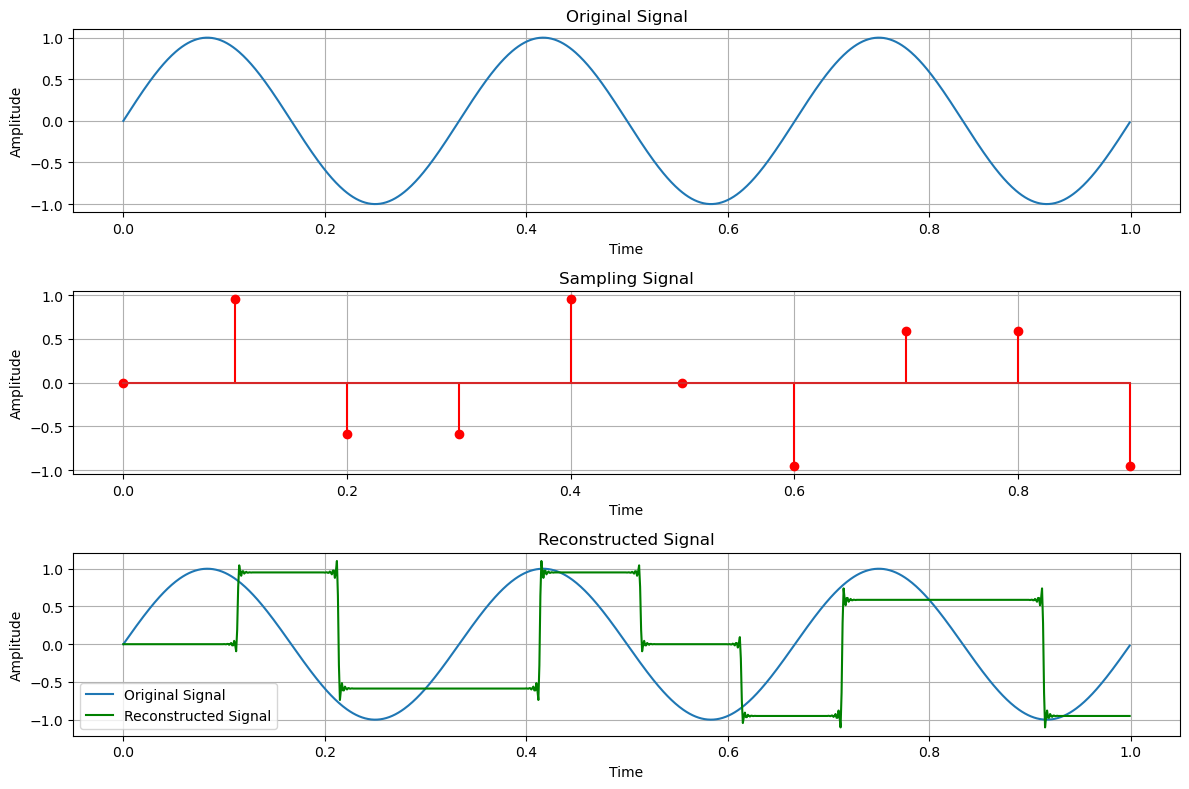

In [8]:
# Vẽ
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(t_sampled, x_sampled, 'r')
plt.title('Sampling Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, x, label='Original Signal')
plt.plot(t, x_reconstructed[:len(t)], 'g', label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()